# KNN DATASET 1-Covid Cases Classification Exercise


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [23]:
import os

In [24]:
path=r'C:\Users\ANIL\Desktop\python\K NN'
os.chdir(path)

In [25]:
df=pd.read_csv('Latest Covid-19 India Status.csv')
df

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Maharashtra,6122893,117869,5881167,123857,1.93,96.05,2.02
1,Kerala,3011694,108400,2889186,14108,3.60,95.93,0.47
2,Karnataka,2862338,39626,2787111,35601,1.38,97.37,1.24
3,Tamil Nadu,2506848,34076,2439576,33196,1.36,97.32,1.32
4,Andhra Pradesh,1911231,32356,1865956,12919,1.69,97.63,0.68
5,Uttar Pradesh,1706934,1947,1682321,22666,0.11,98.56,1.33
6,West Bengal,1508223,16655,1473718,17850,1.10,97.71,1.18
7,Delhi,1434780,858,1408917,25005,0.06,98.20,1.74
8,Chhattisgarh,996689,5017,978208,13464,0.50,98.15,1.35
9,Rajasthan,952887,935,943010,8942,0.10,98.96,0.94


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [27]:
df.shape

(36, 8)

In [28]:
df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,8.530432e+05,13657.111111,8.289951e+05,11250.777778,2.586667,96.158611,1.253889
std,1.223486e+06,27065.893597,1.180420e+06,21412.276037,3.728932,3.632938,0.565298
min,7.491000e+03,14.000000,7.349000e+03,4.000000,0.060000,82.120000,0.040000
25%,5.951300e+04,1033.250000,5.755325e+04,782.500000,0.227500,96.020000,0.930000
50%,4.353345e+05,1966.500000,4.184525e+05,4550.500000,1.130000,97.480000,1.315000
75%,9.638375e+05,12767.750000,9.518095e+05,13055.250000,2.925000,98.242500,1.657500
max,6.122893e+06,117869.000000,5.881167e+06,123857.000000,17.440000,99.600000,2.700000


In [29]:
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Maharashtra,6122893,117869,5881167,123857,1.93,96.05,2.02
1,Kerala,3011694,108400,2889186,14108,3.60,95.93,0.47
2,Karnataka,2862338,39626,2787111,35601,1.38,97.37,1.24
3,Tamil Nadu,2506848,34076,2439576,33196,1.36,97.32,1.32
4,Andhra Pradesh,1911231,32356,1865956,12919,1.69,97.63,0.68


In [30]:
df.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

In [31]:
df

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Maharashtra,6122893,117869,5881167,123857,1.93,96.05,2.02
1,Kerala,3011694,108400,2889186,14108,3.60,95.93,0.47
2,Karnataka,2862338,39626,2787111,35601,1.38,97.37,1.24
3,Tamil Nadu,2506848,34076,2439576,33196,1.36,97.32,1.32
4,Andhra Pradesh,1911231,32356,1865956,12919,1.69,97.63,0.68
5,Uttar Pradesh,1706934,1947,1682321,22666,0.11,98.56,1.33
6,West Bengal,1508223,16655,1473718,17850,1.10,97.71,1.18
7,Delhi,1434780,858,1408917,25005,0.06,98.20,1.74
8,Chhattisgarh,996689,5017,978208,13464,0.50,98.15,1.35
9,Rajasthan,952887,935,943010,8942,0.10,98.96,0.94


In [36]:
df_age=pd.DataFrame(df['Deaths'],columns=['Deaths'],dtype=float)
df_age[df['Deaths']<=10000]='0 to 10000'
df_age[df['Deaths']<=50000]='10000 to 50000'
df_age[df['Deaths']<=150000]='50000 to 150000'

df_age.head(100)

,Deaths
0,50000 to 150000
1,50000 to 150000
2,50000 to 150000
3,50000 to 150000
4,50000 to 150000
5,50000 to 150000
6,50000 to 150000
7,50000 to 150000
8,50000 to 150000
9,50000 to 150000


ValueError: 'label' must be of length 'x'

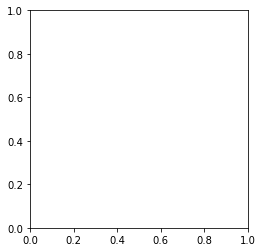

In [34]:
plt.pie([30,40],labels=['0 to 10000','10000 to 50000','50000 to 150000'],autopct='%2.2f%%')
plt.title('Deaths')
plt.show()

# Visualization part

In [19]:
df['Deaths'].unique()

array([123857,  14108,  35601,  33196,  12919,  22666,  17850,  25005,
        13464,   8942,   4358,  10072,   9019,   9515,   9612,   3710,
        16141,   4743,   5118,   7338,   4349,   3486,   3082,   1765,
         1229,    703,    809,    886,    184,    505,    100,    311,
          204,      4,     49,    128], dtype=int64)

array([[<AxesSubplot:title={'center':'Total Cases'}>,
        <AxesSubplot:title={'center':'Active'}>,
        <AxesSubplot:title={'center':'Discharged'}>],
       [<AxesSubplot:title={'center':'Deaths'}>,
        <AxesSubplot:title={'center':'Active Ratio (%)'}>,
        <AxesSubplot:title={'center':'Discharge Ratio (%)'}>],
       [<AxesSubplot:title={'center':'Death Ratio (%)'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

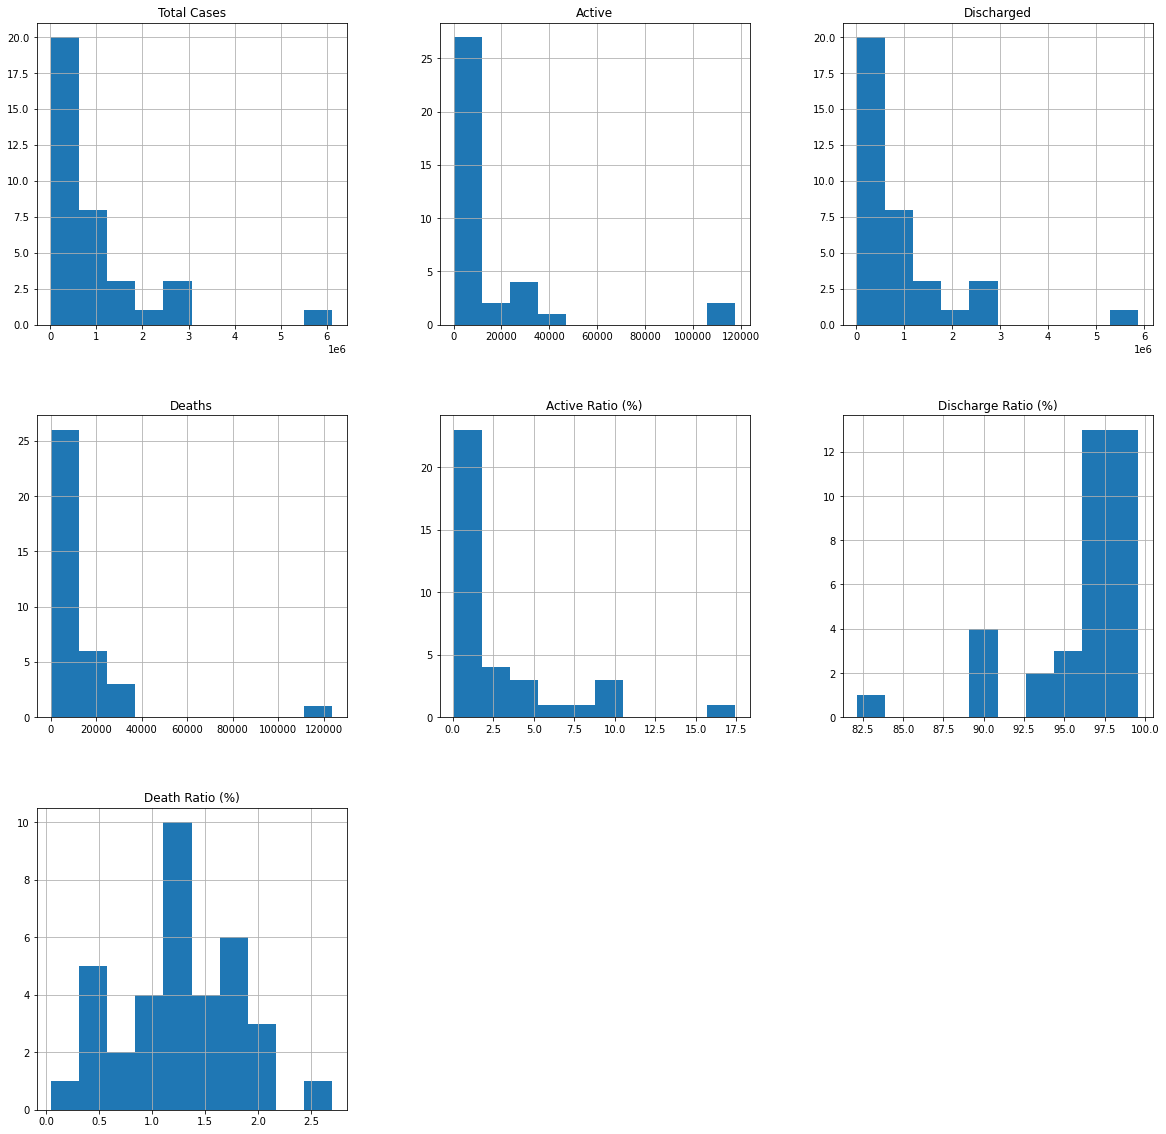

In [14]:
df.hist(figsize=(20,20))

In [15]:
df.columns


Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio (%)', 'Discharge Ratio (%)', 'Death Ratio (%)'],
      dtype='object')

KeyError: 'age'

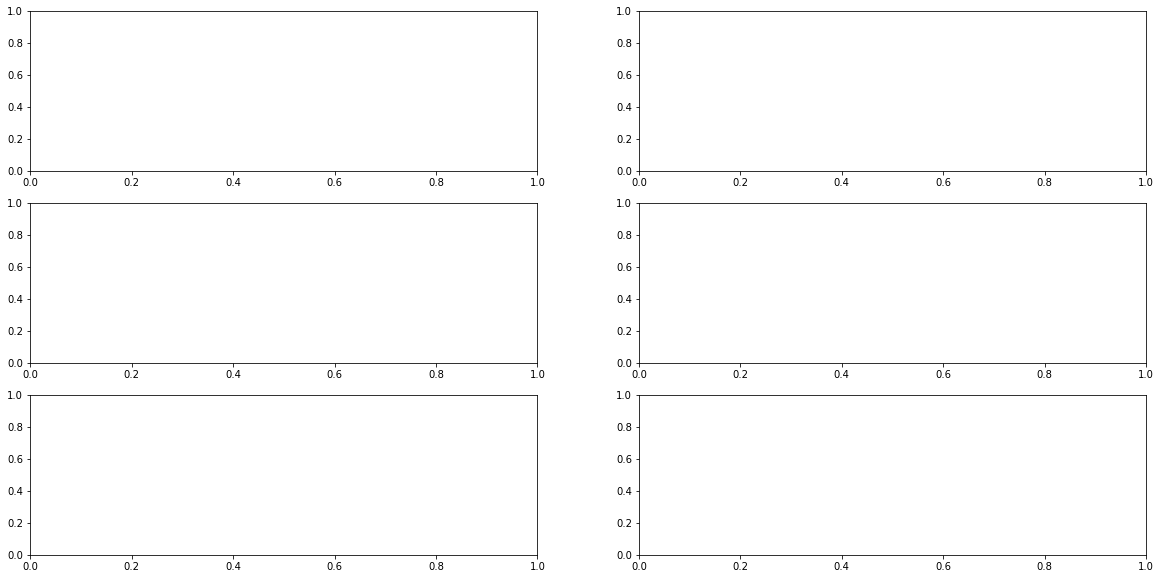

In [16]:
fig, ax = plt.subplots(3, 2)

fig.set_figheight(10)
fig.set_figwidth(20)


sns.distplot(df['age'], ax = ax[0,0])
sns.distplot(df['sex'], ax = ax[0,1])
sns.distplot(df['trtbps'], ax = ax[1,0])
sns.distplot(df['chol'], ax = ax[1,1])
sns.distplot(df['fbs'], ax = ax[2,0])
sns.distplot(df['restecg'], ax = ax[2,1])
sns.distplot(df['thalachh'], ax = ax[3,0])
sns.distplot(df['oldpeak'], ax = ax[3,1])


ax[0,0].set_title('age')
ax[0,1].set_title('sex')
ax[1,0].set_title('trtbps')
ax[1,1].set_title('chol')
ax[2,0].set_title('fbs')
ax[2,1].set_title('restecg')
ax[3,0].set_title('thalachh')
ax[3,1].set_title('oldpeak')
plt.show()

In [ ]:
sns.displot(df, x="cp",hue="age", kde=False)

In [ ]:
sns.displot(df, x="cp", hue="sex", kde=True)

In [ ]:
sns.displot(df, x="cp", hue="chol", kde=False)

In [ ]:
sns.displot(df, x="cp", hue="output", kde=True)

In [ ]:
sns.pairplot(df, hue="cp")

In [ ]:
df.columns

In [ ]:
fig, ax = plt.subplots(2, 2)

fig.set_figheight(15)
fig.set_figwidth(20)

sns.boxplot(df['cp'], df['thall'], ax = ax[0,0])
sns.boxplot(df['cp'], df['oldpeak'], ax = ax[0,1])
sns.boxplot(df['cp'], df['exng'], ax = ax[1,0])
sns.boxplot(df['cp'], df['restecg'], ax = ax[1,1])

ax[0,0].set_title('thall')
ax[0,1].set_title('oldpeak')
ax[1,0].set_title('exng')
ax[1,1].set_title('restecg')
plt.show()

In [ ]:
plt.figure(figsize=(35,35)) 
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, fmt='.2f', cmap="winter")

In [ ]:
df.corr()

In [ ]:
df['cp'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)

# Preprocessiong and rest of the part

In [ ]:
print(df.columns)

In [ ]:
#Splitting the dataset

X=df[['age', 'sex', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']]
y=df['cp']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=80)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=40)   
knn.fit(X_train,y_train)

In [ ]:
y_pred=knn.predict(X_test)
y_pred

In [ ]:
#Measuring the accuracy

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
error_rate = []

for i in range(1,243):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,243),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')